In [1]:
import librosa as lr
import librosa.display as lrd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

import sys
sys.path.append("..")
from libs.utilities import load_autoencoder_lossfunc, load_autoencoder_model
from libs.processing import pink_noise, take_file_as_noise 

SNR_dB = 0

Using TensorFlow backend.
/home/christie/miniconda3/envs/denoising/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
### CONFIGURATION ###

noise_filepath = '/data/riccardo_datasets/npr_news/20180326_me_birth_control_apps_find_a_big_market_in_contraception_deserts_.wav'
input_path = '/data/riccardo_datasets/npr_news/train/newscast220831.wav'


In [3]:
### INPUT PROCESSING ###
print('[dn] Loading data from {}...'.format(input_path))
# load data from file name
x, sr = lr.load(input_path, sr=None, duration=60, offset=20)
s = np.abs(lr.stft(x))

[dn] Loading data from /data/riccardo_datasets/npr_news/train/newscast220831.wav...


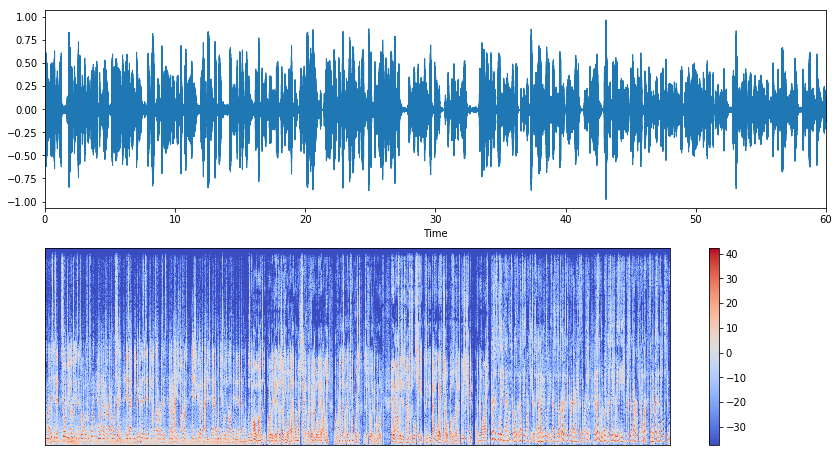

In [4]:
# Display time + frequency representations + audio
plt.figure(figsize=(14, 8))
plt.subplot(211)
lrd.waveplot(x, sr=sr)
plt.subplot(212)
lrd.specshow(lr.amplitude_to_db(s)) #, cmap='coolwarm'
plt.colorbar()
ipd.Audio(x, rate=sr)

In [5]:
# apply noise!
x_noised = take_file_as_noise(noise_filepath)(x=x, sr=sr, snr=SNR_dB)
s_noisyx = np.abs(lr.stft(x_noised))

[l] Using the following file as noise: /data/riccardo_datasets/npr_news/20180326_me_birth_control_apps_find_a_big_market_in_contraception_deserts_.wav
[l] resampling the noise from 22050 to 16000


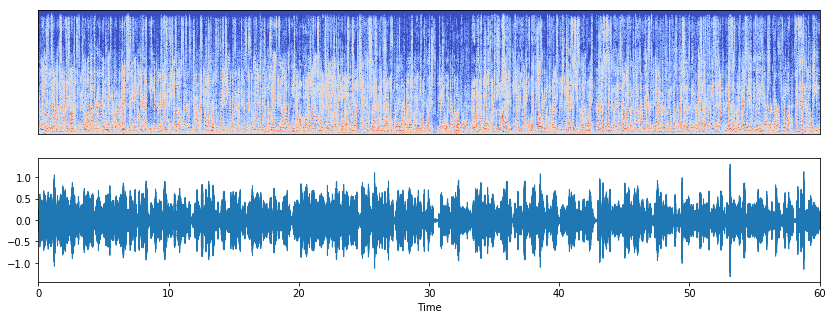

In [6]:
plt.figure(figsize=(14, 5))
plt.subplot(211)
lrd.specshow(lr.amplitude_to_db(s_noisyx))
plt.subplot(212)
lrd.waveplot(x_noised, sr=sr)
ipd.Audio(x_noised, rate=sr)